<a href="https://colab.research.google.com/github/arnautoleg/MihaelaCLH/blob/main/MihaelaCLH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [3]:
#url = "https://github.com/arnautoleg/Dana_Cernev/raw/main/teza%20master%20statistica%20(2)%20(1).xls"
#       https://github.com/arnautoleg/Dana_Cernev/blob/main/teza%20master%20statistica%20(2)%20(1).xls
url = "https://github.com/arnautoleg/MihaelaCLH/raw/793a6f10abf966e364afe406f17d54973dbd57bb/Statistica%202023.xlsx"

df=pd.read_excel(url)

df

,Num fisa,genul,Virsta,Diagnoza,Zile/pat,Tip externare,Ivestigatia microbiologica,leucocite,tip anestezie,Originea,Numarul de spatii,Traheostomie,Complicatii,Metoda de tratament
0,2227637,masc,24,Flegmon al planseului bucal si cervical bila...,15.0,externat,"Peptostreptococcus - gram""+""coci anaerobi",24.45,generala,odontogena,7.0,da,Mediastinita anterioara si posterioara,Metoda clasica
1,2303652,masc,24,Flegmon al planseului bucal pe stinga,16.0,externat,Staphylococcus epidermidis,12.60,generala,odontogena,6.0,da,nu,Metoda clasica
2,2304127,masc,37,Flegmon submento-submandibular pe dreapta de l...,7.0,externat,Streptococcus group B,14.53,ALR+pot,odongtogena,2.0,nu,nu,Metoda clasica
3,2304667,masc,37,Adenoflegmon latero-cervical pe stinga,4.0,externat,Staphylococcus epidermidis,16.60,ALR+pot,tonzilogena,2.0,nu,nu,Metoda clasica
4,2311251,masc,28,Flegmon al planseului bucal pe dreapta de la ...,6.0,externat,Streptococcus group C,11.20,ALR+pot,odontogena,4.0,nu,nu,Metoda clasica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2306229,fem,26,Flegmon submento-subamndibular pe stinga,3.0,externat,Streptococcus group G,18.01,ALR+pot,tonzilogena,2.0,nu,nu,Metoda clasica
99,2310071,masc,55,Flegmon submento-subamndibular pe stinga,3.0,externat,Staphylococcus epidermidis,10.30,ALR+pot,odontogena,2.0,nu,nu,Metoda clasica
100,2317884,masc,65,"Flegmon in regiunea submandibulara, submasete...",5.0,externat,Streptococcus group B,14.98,ALR+pot,odontogena,3.0,nu,nu,Metoda clasica
101,2319490,fem,54,Adenoflegmon submento-submandibular pe stanga,NaN,externat,Streptococcus group C,12.30,ALR+pot,odontogena,2.0,nu,nu,Metoda clasica


AttributeError: ignored

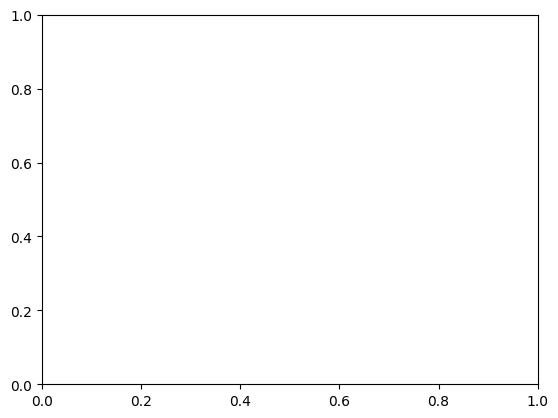

In [7]:

df.genul.value_counts().plot(type='bar')